In [111]:
import re
import pandas as pd
import seaborn as sns
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pprint import pprint
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.weight': 'bold'})


hatches = ['o', '*', '\\\\', 'O', 'x', '\\', '--', 'o']
markers = ['o', '^', "*"]
linestyles = ['dashdot', 'solid', '--']
orig_colors = sns.color_palette("pastel")
# colors = [
#     orig_colors[0], # blue
#     orig_colors[1], # organge
#     orig_colors[2], # green
#     orig_colors[3], # red
#     orig_colors[4], # purple
#     orig_colors[5], # brown
#     orig_colors[6], # pink
#     orig_colors[7], # gray
#     orig_colors[8], # yellow
#     orig_colors[9], # cyan
# ]
recmp_swap_colors = [
    orig_colors[0],
    orig_colors[2],
]

seq_colors = [
    orig_colors[1],
    orig_colors[3],
    orig_colors[6], 
]

[0 1 2 3 4]


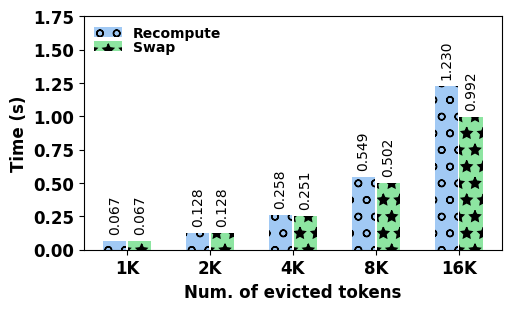

In [112]:
##################Plot Sequence Length Impact##################
def plot_q4a_evicted_tokens():
    output_file = f"./plots/evicted_len_on_overhead"
    x_labels = ("1K", "2K", "4K", "8K", "16K")
    overhead_time = {
        "Recompute": [0.067321, 0.12783, 0.25828, 0.548616, 1.230347],
        "Swap": [0.066979, 0.12811, 0.251428, 0.501644, 0.99207],
    }
    
    # plot the graph
    bar_labels = list(overhead_time.keys())
    bar_width = 0.3
    bar_gap = -0.02
    xrange = np.arange(len(x_labels))
    print(xrange)
    
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    offset = -0.5
    for i, label in enumerate(bar_labels):
        ax.bar(xrange + offset * bar_width, overhead_time[label], bar_width+bar_gap, label=label, color=recmp_swap_colors[i],  hatch=hatches[i])
        offset += 1

    # Annotate the bars
    for j, glabel in enumerate(x_labels):
        offset = -0.5
        for i, blabel in enumerate(bar_labels):
            value = overhead_time[blabel][j]
            # print(value)
            ax.annotate(f'{value:.3f}', (xrange[j] + offset * bar_width, value + 0.05),
                        ha='center', va='bottom', rotation=90, fontsize=10, fontweight='normal')
            offset += 1

    ax.set_xlabel('Num. of evicted tokens', fontsize=12, fontweight='bold')
    ax.set_ylabel('Time (s)', fontsize=12, fontweight='bold')
    ax.set_xticks(xrange)
    ax.set_ylim(top=1.75)
    ax.set_xticklabels(x_labels)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, bar_labels, ncol=1, frameon=False, fontsize=10, loc='upper left',
             borderpad=0.2, labelspacing=0., columnspacing=0.2, ) 
    
    plt.savefig(f"{output_file}.eps", format='eps', bbox_inches='tight')
    plt.savefig(f"{output_file}.png", format='png', bbox_inches='tight')
    
    plt.show()


plot_q4a_evicted_tokens()

[0 1]


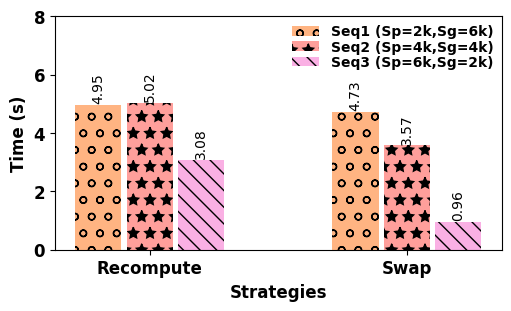

In [113]:
##################Plot Sequence Length Impact##################
def plot_q4a_1_seq_len():
    output_file = f"./plots/seq_len_on_overhead_case2"
    x_labels = ("Recompute", "Swap")

    # 1st try: Q5_a/iter1 results
    # overhead_time = {
    #     "Seq1 (Sp=2k,Sg=6k)": [4.622297, 4.434937],
    #     "Seq2 (Sp=4k,Sg=4k)": [4.701906, 3.322057],
    #     "Seq3 (Sp=6k,Sg=2k)": [4.89333, 1.307947]
    # }
    # 2nd try: Q5_a/iter2 results
    overhead_time = {
        "Seq1 (Sp=2k,Sg=6k)": [4.951883, 4.729432],
        "Seq2 (Sp=4k,Sg=4k)": [5.02322, 3.574427],
        "Seq3 (Sp=6k,Sg=2k)": [3.078835, 0.956]
    } 
    
    # plot the graph
    bar_labels = list(overhead_time.keys())
    bar_width = 0.2
    bar_gap = -0.02
    xrange = np.arange(len(x_labels))
    print(xrange)
    
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    offset = -0.5
    for i, label in enumerate(bar_labels):
        ax.bar(xrange + offset * bar_width , overhead_time[label], bar_width+ bar_gap, label=label, color=seq_colors[i],  hatch=hatches[i])
        offset += 1

    # Annotate the bars
    for j, glabel in enumerate(x_labels):
        offset = -0.5
        for i, blabel in enumerate(bar_labels):
            value = overhead_time[blabel][j]
            # print(value)
            ax.annotate(f'{value:.2f}', (xrange[j] + offset * bar_width, value + 0.05),
                        ha='center', va='bottom', rotation=90, fontsize=10, fontweight='normal')
            offset += 1

    ax.set_xlabel('Strategies', fontsize=12, fontweight='bold')
    ax.set_ylabel('Time (s)', fontsize=12, fontweight='bold')
    ax.set_xticks(xrange + bar_width/2)
    ax.set_ylim(top=8)
    ax.set_xticklabels(x_labels)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, bar_labels, ncol=1, frameon=False, fontsize=10, loc='upper right',
             borderpad=0.1, labelspacing=0.1, columnspacing=0.2, ) 
    
    plt.savefig(f"{output_file}.eps", format='eps', bbox_inches='tight')
    plt.savefig(f"{output_file}.png", format='png', bbox_inches='tight')
    
    plt.show()


plot_q4a_1_seq_len()

[0 1 2 3 4 5]


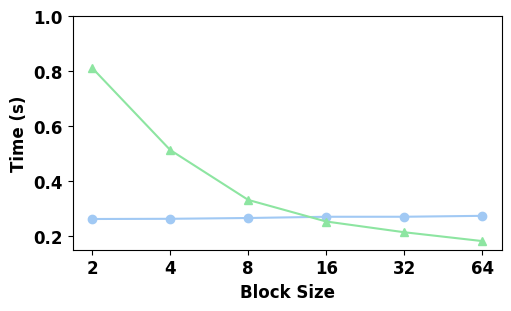

In [114]:
##################Plot Block Size Impact##################
def plot_q4c_overhead():
    output_file = f"./plots/block_size_on_overhead"
    x_labels = ("2", "4", "8", "16", "32", "64")

    overhead_time = {
        "Recompute": [0.261669, 0.262413667, 0.265313333, 0.269805333, 0.269867, 0.273189333],
        "Swap": [0.811594667, 0.512901, 0.331134, 0.252533667, 0.213439667, 0.181261333],
    }
    
    # plot the graph
    bar_labels = list(overhead_time.keys())
    bar_width = 0.3
    bar_gap = -0.02
    xrange = np.arange(len(x_labels))
    print(xrange)
    
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    offset = -0.5
    for i, label in enumerate(bar_labels):
        ax.plot(xrange, overhead_time[label], color=recmp_swap_colors[i], marker=markers[i], linestyle='solid',
                 markersize=6, markerfacecolor=recmp_swap_colors[i], markeredgecolor=recmp_swap_colors[i], zorder=1)
        offset += 1

    # # Annotate the bars
    # for j, glabel in enumerate(x_labels):
    #     offset = -0.5
    #     for i, blabel in enumerate(bar_labels):
    #         value = overhead_time[blabel][j]
    #         # print(value)
    #         ax.annotate(f'{value:.2f}', (xrange[j] + offset * bar_width, value + 0.05),
    #                     ha='center', va='bottom', rotation=90, fontsize=10, fontweight='normal')
    #         offset += 1

    ax.set_xlabel('Block Size', fontsize=12, fontweight='bold')
    ax.set_ylabel('Time (s)', fontsize=12, fontweight='bold')
    ax.set_xticks(xrange)
    ax.set_ylim(top=1)
    ax.set_xticklabels(x_labels)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, bar_labels, ncol=1, frameon=False, fontsize=10, loc='upper right',
             borderpad=0.1, labelspacing=0.1, columnspacing=0.2, ) 
    
    plt.savefig(f"{output_file}.eps", format='eps', bbox_inches='tight')
    plt.savefig(f"{output_file}.png", format='png', bbox_inches='tight')
    
    plt.show()


plot_q4c_overhead()

[0 1 2 3 4 5]


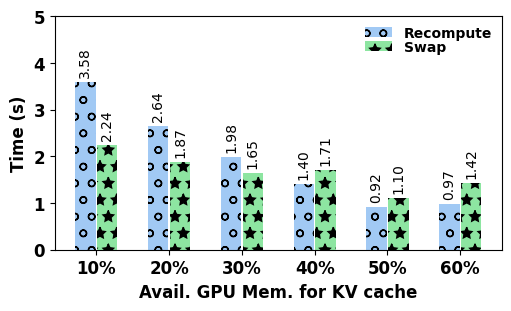

In [115]:
#######Plot Available GPU Mem. for KV cache Impact##################
def plot_q4e_gpu():
    output_file = f"./plots/GPU_on_overhead"
    x_labels = ("10%", "20%", "30%", "40%", "50%", "60%")
    overhead_time = {
        "Recompute": [3.584284, 2.640543, 1.984295, 1.40214, 0.918865, 0.971319],
        "Swap": [2.242717, 1.871145, 1.648941, 1.710009, 1.10208, 1.423259],
    }
    
    # plot the graph
    bar_labels = list(overhead_time.keys())
    bar_width = 0.3
    bar_gap = -0.02
    xrange = np.arange(len(x_labels))
    print(xrange)
    
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    offset = -0.5
    for i, label in enumerate(bar_labels):
        ax.bar(xrange + offset * bar_width, overhead_time[label], bar_width+bar_gap, label=label, color=recmp_swap_colors[i],  hatch=hatches[i])
        offset += 1

    # Annotate the bars
    for j, glabel in enumerate(x_labels):
        offset = -0.5
        for i, blabel in enumerate(bar_labels):
            value = overhead_time[blabel][j]
            # print(value)
            ax.annotate(f'{value:.2f}', (xrange[j] + offset * bar_width, value + 0.1),
                        ha='center', va='bottom', rotation=90, fontsize=10, fontweight='normal')
            offset += 1

    ax.set_xlabel('Avail. GPU Mem. for KV cache', fontsize=12, fontweight='bold')
    ax.set_ylabel('Time (s)', fontsize=12, fontweight='bold')
    ax.set_xticks(xrange)
    ax.set_ylim(top=5)
    ax.set_xticklabels(x_labels)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, bar_labels, ncol=1, frameon=False, fontsize=10, loc='upper right',
             borderpad=0.2, labelspacing=0., columnspacing=0.2, ) 
    
    plt.savefig(f"{output_file}.eps", format='eps', bbox_inches='tight')
    plt.savefig(f"{output_file}.png", format='png', bbox_inches='tight')
    
    plt.show()


plot_q4e_gpu()

[0 1]


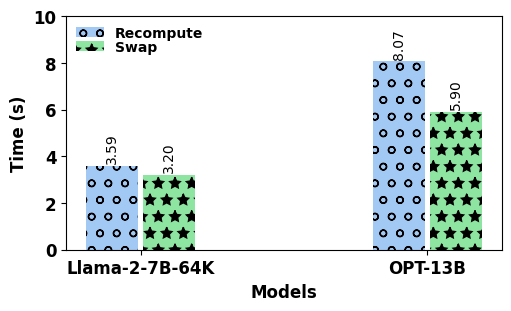

In [116]:
#######Plot Models Impact##################
def plot_q4f_models_on_overhead():
    output_file = f"./plots/diff_models_on_overhead"
    x_labels = ("Llama-2-7B-64K", "OPT-13B")
    overhead_time = {
        "Recompute": [3.585103, 8.068324],
        "Swap": [3.195152, 5.9003],
    }
    
    # plot the graph
    bar_labels = list(overhead_time.keys())
    bar_width = 0.2
    bar_gap = -0.02
    xrange = np.arange(len(x_labels))
    print(xrange)
    
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    offset = -0.5
    for i, label in enumerate(bar_labels):
        ax.bar(xrange + offset * bar_width, overhead_time[label], bar_width+bar_gap, label=label, color=recmp_swap_colors[i],  hatch=hatches[i])
        offset += 1

    # Annotate the bars
    for j, glabel in enumerate(x_labels):
        offset = -0.5
        for i, blabel in enumerate(bar_labels):
            value = overhead_time[blabel][j]
            # print(value)
            ax.annotate(f'{value:.2f}', (xrange[j] + offset * bar_width, value + 0.1),
                        ha='center', va='bottom', rotation=90, fontsize=10, fontweight='normal')
            offset += 1

    ax.set_xlabel('Models', fontsize=12, fontweight='bold')
    ax.set_ylabel('Time (s)', fontsize=12, fontweight='bold')
    ax.set_xticks(xrange)
    ax.set_ylim(top=10)
    ax.set_xticklabels(x_labels)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, bar_labels, ncol=1, frameon=False, fontsize=10, loc='upper left',
             borderpad=0.2, labelspacing=0., columnspacing=0.2, ) 
    
    plt.savefig(f"{output_file}.eps", format='eps', bbox_inches='tight')
    plt.savefig(f"{output_file}.png", format='png', bbox_inches='tight')
    
    plt.show()


plot_q4f_models_on_overhead()

[0 1]
[-0.1  0.9]


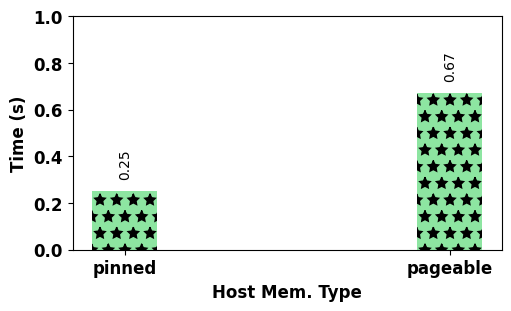

In [117]:
#######Plot Host Mem Type Impact##################
def plot_q4g_hostmem_on_overhead():
    output_file = f"./plots/HostMem_on_overhead"
    x_labels = ("pinned", "pageable")
    overhead_time = {
        "Swap": [0.251844667, 0.671594667],
    }
    
    # plot the graph
    bar_labels = list(overhead_time.keys())
    bar_width = 0.2
    # bar_gap = -0.02
    xrange = np.arange(len(x_labels))
    print(xrange)
    
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    offset = -0.5
    for i, label in enumerate(bar_labels):
        print(xrange + offset * bar_width)
        ax.bar(xrange, overhead_time[label], bar_width, label=label, color=recmp_swap_colors[1],  hatch=hatches[1])
        offset += 1

    # Annotate the bars
    for j, glabel in enumerate(x_labels):
        offset = -0.5
        for i, blabel in enumerate(bar_labels):
            value = overhead_time[blabel][j]
            # print(value)
            ax.annotate(f'{value:.2f}', (xrange[j], value + 0.05),
                        ha='center', va='bottom', rotation=90, fontsize=10, fontweight='normal')
            offset += 1

    ax.set_xlabel('Host Mem. Type', fontsize=12, fontweight='bold')
    ax.set_ylabel('Time (s)', fontsize=12, fontweight='bold')
    ax.set_xticks(xrange)
    ax.set_ylim(top=1)
    ax.set_xticklabels(x_labels)

    # handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles, bar_labels, ncol=1, frameon=False, fontsize=10, loc='upper left',
    #          borderpad=0.2, labelspacing=0., columnspacing=0.2, ) 
    # plt.tight_layout(pad=2.0)
    
    plt.savefig(f"{output_file}.eps", format='eps', bbox_inches='tight')
    plt.savefig(f"{output_file}.png", format='png', bbox_inches='tight')
    
    plt.show()


plot_q4g_hostmem_on_overhead()